# Slide anterior para ser reproduzido

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.48.18.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.41.51.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.42.01.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.42.16.png)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Reproduzir o Exemplo do Slide anterior

--- Passo 1: Reprodução do Exemplo do Slide 7 ---


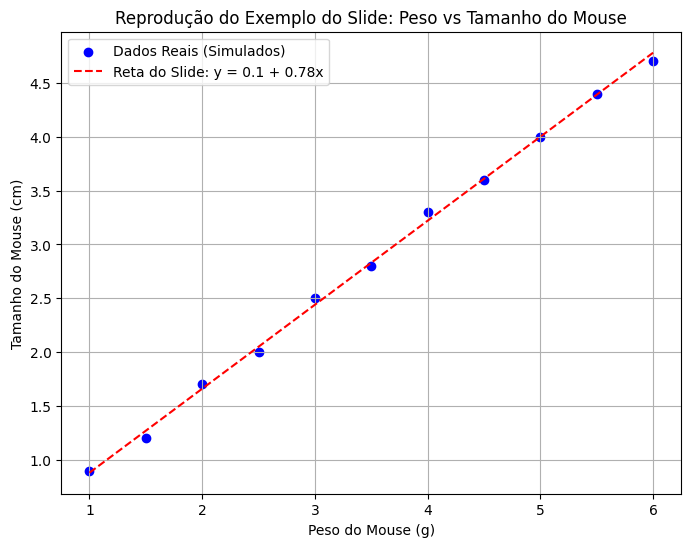

Dados Simulados (Peso X): [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Dados Simulados (Tamanho Y): [0.9 1.2 1.7 2.  2.5 2.8 3.3 3.6 4.  4.4 4.7]
--------------------------------------------------


In [ ]:
print("--- Passo 1: Reprodução do Exemplo do Slide 7 ---")

# Dados simulados baseados no gráfico do slide 7
# (Peso do mouse em g)
X_peso = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
# (Tamanho do mouse em cm)
# Valores y aproximados para que a reta y = 0.1 + 0.78x seja um bom ajuste
y_tamanho = np.array([0.9, 1.2, 1.7, 2.0, 2.5, 2.8, 3.3, 3.6, 4.0, 4.4, 4.7])

# A equação do slide é y = 0.1 + 0.78x. Vamos visualizá-la.
intercepto_slide = 0.1
coeficiente_angular_slide = 0.78
y_previsto_slide = intercepto_slide + coeficiente_angular_slide * X_peso

plt.figure(figsize=(8, 6))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados Reais (Simulados)')
plt.plot(X_peso, y_previsto_slide, color='red', linestyle='--', label=f'Reta do Slide: y = {intercepto_slide} + {coeficiente_angular_slide}x')
plt.title('Reprodução do Exemplo do Slide: Peso vs Tamanho do Mouse')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Dados Simulados (Peso X): {X_peso}")
print(f"Dados Simulados (Tamanho Y): {y_tamanho}")
print("-" * 50)

# Aplicar Regressão Linear com Scikit-learn


Regressão Linear com Scikit-learn ---
Intercepto (scikit-learn): 0.1100
Coeficiente Angular (scikit-learn): 0.7764


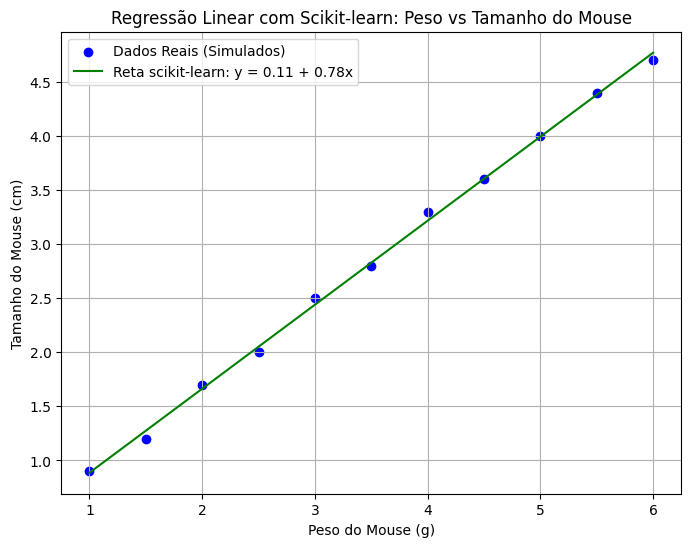

--------------------------------------------------


In [8]:
print("\nRegressão Linear com Scikit-learn ---")

# Redimensionar X para o formato que o scikit-learn espera (N, 1)
X_peso_reshaped = X_peso.reshape(-1, 1)

# Criar e treinar o modelo de Regressão Linear
model_sklearn = LinearRegression()
model_sklearn.fit(X_peso_reshaped, y_tamanho)

# Obter os coeficientes
intercepto_sklearn = model_sklearn.intercept_
coeficiente_angular_sklearn = model_sklearn.coef_[0]

print(f"Intercepto (scikit-learn): {intercepto_sklearn:.4f}")
print(f"Coeficiente Angular (scikit-learn): {coeficiente_angular_sklearn:.4f}")

# Fazer previsões com o modelo
y_previsto_sklearn = model_sklearn.predict(X_peso_reshaped)

# Plotar os dados e a reta de regressão do scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados Reais (Simulados)')
plt.plot(X_peso, y_previsto_sklearn, color='green', label=f'Reta scikit-learn: y = {intercepto_sklearn:.2f} + {coeficiente_angular_sklearn:.2f}x')
plt.title('Regressão Linear com Scikit-learn: Peso vs Tamanho do Mouse')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend()
plt.show()
print("-" * 50)

# Utilizaçao do Statsmodels para Estatísticas da Regressão

In [9]:
print("\n--- Passo 3: Estatísticas da Regressão com Statsmodels ---")

# Adicionar uma constante (intercepto) à variável independente para o Statsmodels
X_peso_sm = sm.add_constant(X_peso)

# Criar e ajustar o modelo OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_tamanho, X_peso_sm)
results_sm = model_sm.fit()

# Imprimir o resumo das estatísticas
print(results_sm.summary())
print("-" * 50)


--- Passo 3: Estatísticas da Regressão com Statsmodels ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5639.
Date:                Fri, 23 May 2025   Prob (F-statistic):           6.66e-14
Time:                        17:59:40   Log-Likelihood:                 17.558
No. Observations:                  11   AIC:                            -31.12
Df Residuals:                       9   BIC:                            -30.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Plotar Retas com Diferentes Coeficientes Angulares (a's) ---


---Plotando Retas com Diferentes Coeficientes Angulares ---


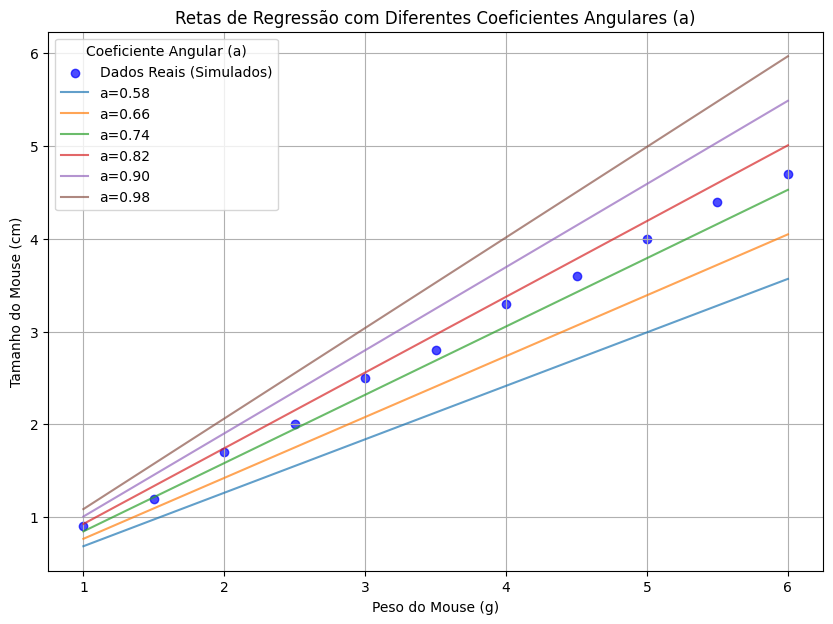

--------------------------------------------------


In [10]:
print("\n---Plotando Retas com Diferentes Coeficientes Angulares ---")

# O intercepto 'b' (no slide 7, que é o 'a' na equação y=a+bx) é o que foi obtido pelo scikit-learn
# O slide pede para usar 6 diferentes 'a's para a rotação, mas a notação do slide é confusa
# pois 'a' é o intercepto e 'b' é o slope.
# Vamos assumir que "a" se refere a diferentes valores de coeficiente angular para demonstração.
# Usaremos o intercepto obtido pelo scikit-learn como fixo e variaremos o coeficiente angular (slope).
# Coeficiente angular ideal (do scikit-learn)
best_slope = coeficiente_angular_sklearn

# 6 diferentes "a's" (variando o coeficiente angular ao redor do valor ideal)
# Ajustando os valores para que sejam razoáveis para a visualização
slopes_to_test = np.linspace(best_slope - 0.2, best_slope + 0.2, 6) # Exemplo: 6 valores ao redor do melhor slope

plt.figure(figsize=(10, 7))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados Reais (Simulados)', alpha=0.7)

for slope in slopes_to_test:
    y_pred_current_slope = intercepto_sklearn + slope * X_peso
    plt.plot(X_peso, y_pred_current_slope, linestyle='-', alpha=0.7, label=f'a={slope:.2f}')

plt.title('Retas de Regressão com Diferentes Coeficientes Angulares (a)')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend(title='Coeficiente Angular (a)')
plt.show()
print("-" * 50)

# Gerar o Gráfico de Soma dos Resíduos ao Quadrado (SSR) 



--- Passo 5: Gráfico da Soma dos Quadrados dos Resíduos (SSR) ---


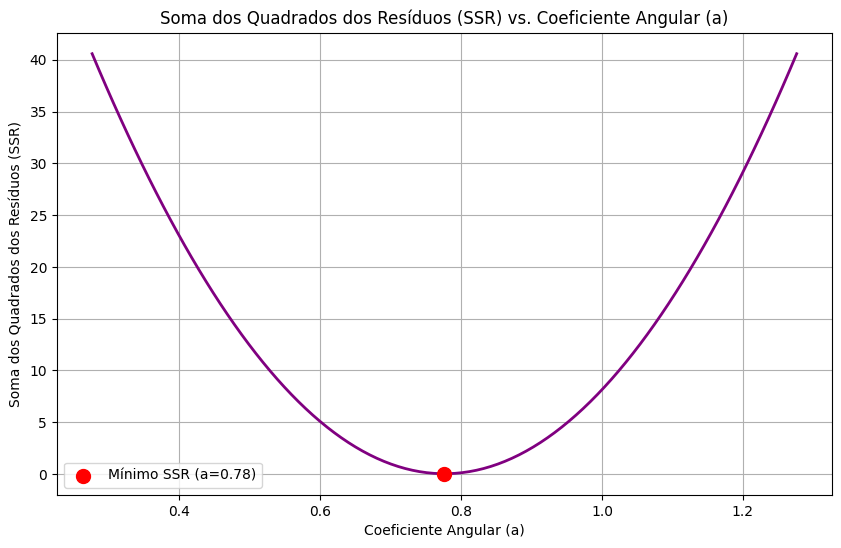

--------------------------------------------------


In [11]:
print("\n--- Passo 5: Gráfico da Soma dos Quadrados dos Resíduos (SSR) ---")

# Usar um range mais fino de coeficientes angulares para a curva
slopes_for_ssr_plot = np.linspace(best_slope - 0.5, best_slope + 0.5, 100)
ssr_values = []
r_squared_values = []

for slope in slopes_for_ssr_plot:
    y_pred = intercepto_sklearn + slope * X_peso
    residuals = y_tamanho - y_pred
    ssr = np.sum(residuals**2)
    ssr_values.append(ssr)

    # Calcular R-squared para cada 'a'
    ss_total = np.sum((y_tamanho - np.mean(y_tamanho))**2)
    ss_residual = ssr
    r2 = 1 - (ss_residual / ss_total)
    r_squared_values.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(slopes_for_ssr_plot, ssr_values, color='purple', linewidth=2)
plt.scatter(best_slope, np.sum((y_tamanho - (intercepto_sklearn + best_slope * X_peso))**2),
            color='red', s=100, zorder=5, label=f'Mínimo SSR (a={best_slope:.2f})')
plt.title('Soma dos Quadrados dos Resíduos (SSR) vs. Coeficiente Angular (a)')
plt.xlabel('Coeficiente Angular (a)')
plt.ylabel('Soma dos Quadrados dos Resíduos (SSR)')
plt.grid(True)
plt.legend()
plt.show()
print("-" * 50)


--- Passo 6: R-Squared para Diferentes Coeficientes Angulares ---
R-Squared do modelo scikit-learn (melhor ajuste): 0.9984
Melhor R-Squared encontrado na varredura (a=0.7713): 0.9982


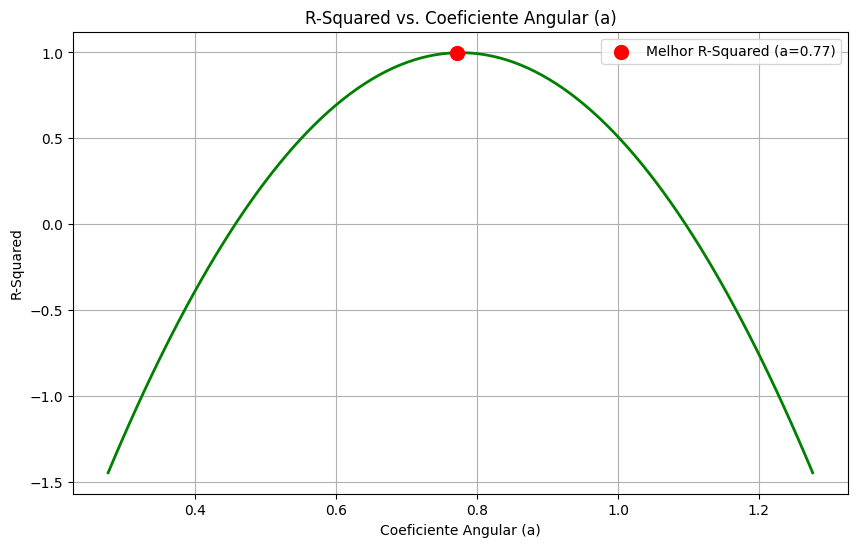

--------------------------------------------------


In [12]:
print("\n--- Passo 6: R-Squared para Diferentes Coeficientes Angulares ---")

# Encontrar o índice do melhor R-squared
best_r2_index = np.argmax(r_squared_values)
best_r2_slope = slopes_for_ssr_plot[best_r2_index]
best_r2_value = r_squared_values[best_r2_index]

print(f"R-Squared do modelo scikit-learn (melhor ajuste): {model_sklearn.score(X_peso_reshaped, y_tamanho):.4f}")
print(f"Melhor R-Squared encontrado na varredura (a={best_r2_slope:.4f}): {best_r2_value:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(slopes_for_ssr_plot, r_squared_values, color='green', linewidth=2)
plt.scatter(best_r2_slope, best_r2_value,
            color='red', s=100, zorder=5, label=f'Melhor R-Squared (a={best_r2_slope:.2f})')
plt.title('R-Squared vs. Coeficiente Angular (a)')
plt.xlabel('Coeficiente Angular (a)')
plt.ylabel('R-Squared')
plt.grid(True)
plt.legend()
plt.show()
print("-" * 50)

# Análise Detalhada das Métricas da Regressão

In [14]:
print("\n--- Passo 7: Análise Detalhada das Métricas da Regressão ---")
print("Análise do Resumo do Statsmodels:")

# Extrair e explicar métricas importantes do summary
# R-squared
r_squared_sm = results_sm.rsquared
print(f"\n1. R-squared: {r_squared_sm:.4f}")
print("   - Interpretação: Indica a proporção da variância na variável dependente (Tamanho do Mouse) que pode ser explicada pela variável independente (Peso do Mouse). Um valor próximo a 1 significa que o modelo explica uma grande parte da variabilidade. Neste caso, um R-squared alto sugere um bom ajuste da linha aos dados.")

# Adjusted R-squared
adj_r_squared_sm = results_sm.rsquared_adj
print(f"\n2. Adjusted R-squared: {adj_r_squared_sm:.4f}")
print("   - Interpretação: É uma versão ajustada do R-squared que penaliza a inclusão de variáveis preditoras que não melhoram significativamente o modelo. Em modelos com poucas variáveis (como este, com apenas uma), o Adjusted R-squared é muito próximo do R-squared. É mais útil em regressão múltipla.")

# F-statistic e Prob (F-statistic)
f_statistic_sm = results_sm.fvalue
prob_f_statistic_sm = results_sm.f_pvalue
print(f"\n3. F-statistic: {f_statistic_sm:.2f}")
print(f"   Prob (F-statistic) (p-value do modelo): {prob_f_statistic_sm:.4f}")
print("   - Interpretação: O F-statistic testa a significância global do modelo de regressão. A hipótese nula é que todos os coeficientes de regressão (exceto o intercepto) são zero (ou seja, nenhuma variável independente explica a variável dependente). Um P-value muito baixo (< 0.05) para o F-statistic indica que o modelo é estatisticamente significativo e que pelo menos uma variável independente explica a variável dependente.")

# Coeficientes e P-values dos Coeficientes
print("\n4. Coeficientes e P-values Individuais:")
print(results_sm.pvalues)
print("   - Interpretação:")
print(f"     - Coeficiente 'const' (Intercepto): {results_sm.params[0]:.4f}, P-value: {results_sm.pvalues[0]:.4f}")
print("       - O p-value do intercepto testa se o intercepto é significativamente diferente de zero. Um p-value baixo indica que ele é estatisticamente significativo.")
print(f"     - Coeficiente 'x1' (Peso do Mouse): {results_sm.params[1]:.4f}, P-value: {results_sm.pvalues[1]:.4f}")
print("       - O p-value do coeficiente da variável independente ('x1' ou Peso do Mouse) testa se essa variável tem uma relação linear estatisticamente significativa com a variável dependente. Um p-value muito baixo (< 0.05) indica que o peso do mouse é um preditor significativo do tamanho do mouse.")
print("   - Em geral, P-values abaixo de um nível de significância (e.g., 0.05) indicam que o coeficiente correspondente é estatisticamente diferente de zero, significando que a variável preditora tem uma contribuição significativa para o modelo.")

print("\nConclusão da Análise:")
print("O modelo de regressão linear ajustado é estatisticamente significativo, com um alto R-squared, indicando que o peso do mouse explica uma grande parte da variância no tamanho do mouse. Tanto o intercepto quanto o coeficiente angular (Peso do Mouse) são altamente significativos.")


--- Passo 7: Análise Detalhada das Métricas da Regressão ---
Análise do Resumo do Statsmodels:

1. R-squared: 0.9984
   - Interpretação: Indica a proporção da variância na variável dependente (Tamanho do Mouse) que pode ser explicada pela variável independente (Peso do Mouse). Um valor próximo a 1 significa que o modelo explica uma grande parte da variabilidade. Neste caso, um R-squared alto sugere um bom ajuste da linha aos dados.

2. Adjusted R-squared: 0.9982
   - Interpretação: É uma versão ajustada do R-squared que penaliza a inclusão de variáveis preditoras que não melhoram significativamente o modelo. Em modelos com poucas variáveis (como este, com apenas uma), o Adjusted R-squared é muito próximo do R-squared. É mais útil em regressão múltipla.

3. F-statistic: 5639.04
   Prob (F-statistic) (p-value do modelo): 0.0000
   - Interpretação: O F-statistic testa a significância global do modelo de regressão. A hipótese nula é que todos os coeficientes de regressão (exceto o interce